# Estudo do tempo de corrida por km e do gênero de um maratonista 📚

---


## Análise a partir da Maratona de Boston 2023 🏃


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
# leitura do arquivo

uri = "./boston_marathon_2023.csv"
maratona = pd.read_csv(uri)

In [ ]:
#@title INformações da maratonininhaaaaaaaaaaaaaaa
#@markdown assim tambem
maratona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   divisao_faixa                    26598 non-null  object 
 1   posicao_geral                    26598 non-null  int64  
 2   posicao_genero                   26598 non-null  int64  
 3   posicao_faixa                    26598 non-null  int64  
 4   nome                             26598 non-null  object 
 5   equipe                           26598 non-null  object 
 6   numero_peito                     26598 non-null  object 
 7   tempo_meia_maratona              26526 non-null  object 
 8   tempo_liquido_maratona           26598 non-null  object 
 9   tempo_bruto_maratona             26598 non-null  object 
 10  genero                           26598 non-null  object 
 11  tempo_meia_maratona_segundos     26526 non-null  float64
 12  tempo_liquido_mara

## Arrumando estrutura do dataset 📊

In [ ]:
# verificar duplicações
maratona.duplicated().any()

False

In [ ]:
# renomeando colunas

maratona.columns = ["divisao_faixa", "posicao_geral", "posicao_genero", "posicao_faixa", "nome", "equipe", "numero_peito", "tempo_meia_maratona", "tempo_liquido_maratona", "tempo_bruto_maratona", "genero", "tempo_meia_maratona_segundos", "tempo_liquido_maratona_segundos", "tempo_bruto_maratona_segundos", "tempo_liquido_maratona_minutos"]
maratona.head()

,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333


In [ ]:
# pace

maratona['pace'] = maratona['tempo_liquido_maratona_minutos'] / 42
maratona.head()

,divisao_faixa,posicao_geral,posicao_genero,posicao_faixa,nome,equipe,numero_peito,tempo_meia_maratona,tempo_liquido_maratona,tempo_bruto_maratona,genero,tempo_meia_maratona_segundos,tempo_liquido_maratona_segundos,tempo_bruto_maratona_segundos,tempo_liquido_maratona_minutos,pace
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000,2.997619
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667,3.001587
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000,3.002381
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667,3.048016
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333,3.061508


In [ ]:
# selecionando somente campos por gênero

homens = maratona[maratona['genero'] == 'M']
mulheres = maratona[maratona['genero'] == 'W']


## Análise de dados 📊



In [ ]:
# mostrando a média do Pace

## para todos
mp_todos = maratona['pace'].mean()

## para homens
mp_homens = homens['pace'].mean()

## para mulheres
mp_mulheres = mulheres['pace'].mean()

print(f"Média Pace Geral: {mp_todos}")
print(f"Média Pace Homens: {mp_homens}")
print(f"Média Pace Mulheres: {mp_mulheres}")

Média Pace Geral: 5.298070209360532
Média Pace Homens: 5.057744645799011
Média Pace Mulheres: 5.617333137404485


In [ ]:
# média de tempo líquido de conclusão de prova em minutos

## para todos
ml_todos = maratona['tempo_liquido_maratona_minutos'].mean()

## para homens
ml_homens = homens['tempo_liquido_maratona_minutos'].mean()

## para mulheres
ml_mulheres = mulheres['tempo_liquido_maratona_minutos'].mean()

print(f"Média Tempo Geral: {ml_todos}")
print(f"Média Tempo Homens: {ml_homens}")
print(f"Média Tempo Mulheres: {ml_mulheres}")



Média Tempo Geral: 222.51894879314233
Média Tempo Homens: 212.42527512355846
Média Tempo Mulheres: 235.92799177098834


In [ ]:
maratona['pace'].info

<bound method Series.info of 0        2.997619
1        3.001587
2        3.002381
3        3.048016
4        3.061508
           ...   
26593    7.828571
26594    8.109921
26595    8.166270
26596    7.240476
26597    7.326190
Name: pace, Length: 26598, dtype: float64>

In [ ]:
# dados do pace

maratona['pace'].describe


<bound method NDFrame.describe of 0        2.997619
1        3.001587
2        3.002381
3        3.048016
4        3.061508
           ...   
26593    7.828571
26594    8.109921
26595    8.166270
26596    7.240476
26597    7.326190
Name: pace, Length: 26598, dtype: float64>

In [ ]:
# desvio padrão do pace geral

maratona['pace'].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 0        2.997619
1        3.001587
2        3.002381
3        3.048016
4        3.061508
           ...   
26593    7.828571
26594    8.109921
26595    8.166270
26596    7.240476
26597    7.326190
Name: pace, Length: 26598, dtype: float64>

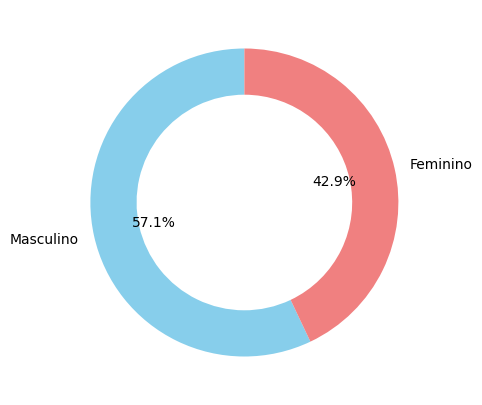

In [ ]:
# relação de gêneros
df = maratona['genero'].value_counts()

# Plotar gráfico de pizza
df.plot(kind='pie', autopct='%1.1f%%', labels=['Masculino','Feminino'],  startangle=90, figsize=(5, 5), colors=['skyblue', 'lightcoral'], wedgeprops=dict(width=0.3))

#plt.title("Distribuição de Gêneros")
plt.ylabel("")  # remove o rótulo do eixo y
plt.show()

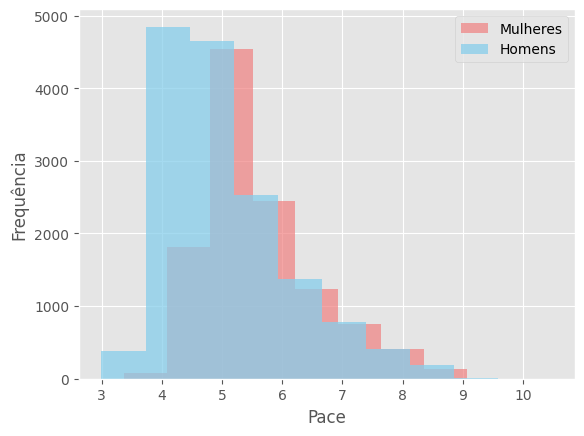

In [ ]:
# histograma de paces por gênero

plt.hist(mulheres['pace'], alpha=0.7, label='Mulheres', color='lightcoral')
plt.hist(homens['pace'], alpha=0.75, label='Homens',color='skyblue')
plt.xlabel('Pace', )
plt.ylabel('Frequência')
plt.legend()
plt.show()

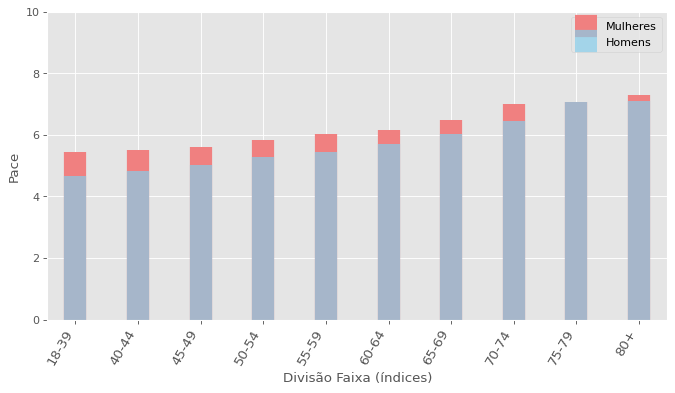

In [ ]:
# pace médio for faixa etária e gênero

##  Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white', dpi=80)

# Adicionar as barras verticais representando a média de pace para mulheres
ax.vlines(x=mpf_mulheres.index, ymin=0, ymax=mpf_mulheres['pace'], color='lightcoral', alpha=1, linewidth=20, label='Mulheres')

##  Configurar título, rótulos dos eixos e limites do eixo y
# ax.set_title('Média de Pace por Faixa Etária e por Gênero', fontdict={'size': 22})

plt.xticks(mpf_homens.index, mpf_homens['divisao_faixa'], rotation=60, horizontalalignment='right', fontsize=12)

##  Adicionar as barras verticais representando a média de pace
ax.vlines(x=mpf_homens.index, ymin=0, ymax=mpf_homens['pace'], color='skyblue', alpha=0.7, linewidth=20, label='Homens')

# Configurar título, rótulos dos eixos e limites do eixo y
# ax.set_title('Média de Pace por Faixa Etária e por Gênero', fontdict={'size': 22})

ax.set(ylabel='Pace', ylim=(0, 10))
ax.set(xlabel='Divisão Faixa (índices)')

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.show()

# Plot 📊

In [ ]:
# mostrando o desvio padrão para tempo de conclusão da prova em minutos

## para todos
dp_todos = maratona['tempo_liquido_maratona_minutos'].std()

## para homens
dp_homens = homens['tempo_liquido_maratona_minutos'].std()

## para mulheres
dp_mulheres = mulheres['tempo_liquido_maratona_minutos'].std()

print(f"Desvio Padrão Geral: {dp_todos}")
print(f"Desvio Padrão Homens: {dp_homens}")
print(f"Desvio Padrão Mulheres: {dp_mulheres}")

Desvio Padrão Geral: 43.75487240453691
Desvio Padrão Homens: 43.65521538037227
Desvio Padrão Mulheres: 40.13791785516366
